In [1]:
from data_analytics.graphs import display_caption
import data_analytics.github as github
import data_analytics.exploratory_data_analysis_reports as eda_reports
import pandas
import matplotlib.pyplot as pyplot
import seaborn

Perennial Ryegrass (95% of Irish Grassland)


- It may not survive very cold winters (minus 6oC or less; Cool et al., 2004).
- Its optimum growth temperature is 18-20oC (Mitchell, 1956)
- L. perenne is most productive in spring and autumn (Waller and Sale, 2001)


Rainfall - https://data.cso.ie/table/MTM01 : Ideal crops wet or dry conditions, as well of production to feed livestock.  
Temperature - https://data.cso.ie/table/MTM02 : Viability of specific crops due to humidity (E.g. 20-25 Celsius max temp.)  
Sunshine - https://data.cso.ie/table/MTM03 : Minimum levels of sunshine for crops to synthesise and grow.  
Fertiliser - https://data.cso.ie/table/AJM05 :  
Area Farmed in June - https://data.cso.ie/table/AQA06 : Percentage of grassland compared to farmland - other crops. Could also look into reduction of farmland and globalisation growth. Globalization. Opportunity to produce locally shortening supply chains.   
CLC Land Cover Change - https://data.cso.ie/table/GCA02 : Changes between grass and cropland. 

In [2]:
area_farmed_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-area-farmed-june-aqa06.csv')
fert_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-fertilizers-ajm05.csv')
land_cover_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-clc-land-cover-gca02.csv')

In [2]:
rainfall_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-rainfall-mtm01.csv')
sunshine_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-sunshine-mtm03.csv')
temperature_dataframe = pandas.read_csv('./../assets/cso-2022-01Jan-10-temperature-mtm02.csv')

In [4]:
eda_reports.print_dataframe_analysis_report(rainfall_dataframe, "rainfall_dataframe")
eda_reports.print_dataframe_analysis_report(sunshine_dataframe, "sunshine_dataframe")
eda_reports.print_dataframe_analysis_report(temperature_dataframe, "temperature_dataframe")

Row, Column Count: (34515, 5)


,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Total Rainfall,1958M01,Belmullet,Millimetres,160.2
1,Total Rainfall,1958M01,Birr,Millimetres,95.6
2,Total Rainfall,1958M01,Valentia Observatory,Millimetres,214.8
3,Total Rainfall,1958M01,Casement,Millimetres,NaN
4,Total Rainfall,1958M01,Claremorris,Millimetres,146.9


Statistic                          object
Month                              object
Meteorological Weather Station     object
UNIT                               object
VALUE                             float64
dtype: object

Number of duplicate rows:  0


Statistic                            0
Month                                0
Meteorological Weather Station       0
UNIT                                 0
VALUE                             4674
dtype: int64


No single value columns found.


- The column "VALUE" has 2836 outliers. Recommend removing outliers.


Row, Column Count: (23010, 5)


,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Total Sunshine Hours,1958M01,Belmullet,Number,43.7
1,Total Sunshine Hours,1958M01,Birr,Number,64.6
2,Total Sunshine Hours,1958M01,Valentia Observatory,Number,46.8
3,Total Sunshine Hours,1958M01,Casement,Number,NaN
4,Total Sunshine Hours,1958M01,Claremorris,Number,51.6


Statistic                          object
Month                              object
Meteorological Weather Station     object
UNIT                               object
VALUE                             float64
dtype: object

Number of duplicate rows:  0


Statistic                            0
Month                                0
Meteorological Weather Station       0
UNIT                                 0
VALUE                             4463
dtype: int64


- The column `UNIT` has only one value. Recommend removing.


- The column "VALUE" has 68 outliers. Recommend removing outliers.


Row, Column Count: (57525, 5)


,Statistic,Month,Meteorological Weather Station,UNIT,VALUE
0,Average Maximum Temperature,1958M01,Belmullet,Degrees C,8.2
1,Average Maximum Temperature,1958M01,Birr,Degrees C,7.8
2,Average Maximum Temperature,1958M01,Valentia Observatory,Degrees C,9.7
3,Average Maximum Temperature,1958M01,Casement,Degrees C,NaN
4,Average Maximum Temperature,1958M01,Claremorris,Degrees C,7.4


Statistic                          object
Month                              object
Meteorological Weather Station     object
UNIT                               object
VALUE                             float64
dtype: object

Number of duplicate rows:  0


Statistic                            0
Month                                0
Meteorological Weather Station       0
UNIT                                 0
VALUE                             7820
dtype: int64


- The column `UNIT` has only one value. Recommend removing.


- The column "VALUE" has 166 outliers. Recommend removing outliers.



Not all stations have presented solid results in terms of continuous data. Some have operated for certing periods but not the entire timeline seen on the dataset. Also, for a fair comparisson, the goal is to collect the maximum number of Meteorological Stations with published data in the last five years.

Criteria:
1. To have published the data in all: Rainfall, Sunshine and Temperature datasets.
2. For the data to be complete with no null values in the last five years.


The only Stations that meet the criteria are listed in the dictionary below:

In [5]:
stations_to_keep = ['Casement' , 'Cork airport', 'Dublin airport', 'Shannon airport']

In [6]:
area_farmed_dataframe.head()

,Statistic,Year,Type of Land Use,Region,UNIT,VALUE
0,Area Farmed in June,2013,Area farmed (AAU),State,000 Hectares,4477.8
1,Area Farmed in June,2013,Area farmed (AAU),Northern and Western,000 Hectares,1500.6
2,Area Farmed in June,2013,Area farmed (AAU),Border,000 Hectares,713.3
3,Area Farmed in June,2013,Area farmed (AAU),West,000 Hectares,787.3
4,Area Farmed in June,2013,Area farmed (AAU),Southern,000 Hectares,2045.2


In [7]:
area_farmed_dataframe = area_farmed_dataframe.rename(columns={'Type of Land Use':'Land_Type'})

In [8]:
land_cover_dataframe

,Statistic,Year,State,UNIT,VALUE
0,Change from Non-irrigated arable land to Pastures,2012 - 2018,State,Area (hectares),58248
1,Change from Pastures to Non-irrigated arable land,2012 - 2018,State,Area (hectares),54111
2,Change from Pastures to Transitional woodland-...,2012 - 2018,State,Area (hectares),10428
3,Change from Land principally occupied by agric...,2012 - 2018,State,Area (hectares),2812
4,Change from Pastures to Construction sites,2012 - 2018,State,Area (hectares),1091
...,...,...,...,...,...
67,% Change from Construction sites to Transition...,2012 - 2018,State,%,<0.1
68,% Change from Land principally occupied by agr...,2012 - 2018,State,%,<0.1
69,% Change from Inland marshes to Non-irrigated ...,2012 - 2018,State,%,<0.1
70,% Change from Sport and leisure facilities to ...,2012 - 2018,State,%,<0.1


In [9]:
fert_dataframe

,Statistic,Month,Type of Fertiliser,UNIT,VALUE
0,Fertiliser Price,1980M01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,121
1,Fertiliser Price,1980M01,Urea (46% N),Euro per Tonne,144
2,Fertiliser Price,1980M01,Granular Superphosphate (16% P),Euro per Tonne,160
3,Fertiliser Price,1980M01,Muriate of Potash (50% K),Euro per Tonne,109
4,Fertiliser Price,1980M01,Compound 0-10-20,Euro per Tonne,130
...,...,...,...,...,...
12043,Fertiliser Price,2021M10,Compound 15-3-20,Euro per Tonne,.
12044,Fertiliser Price,2021M10,Compound 24-2.2-10,Euro per Tonne,.
12045,Fertiliser Price,2021M10,Compound 24-2.2-4.5,Euro per Tonne,423
12046,Fertiliser Price,2021M10,Compound 19-0-15,Euro per Tonne,501


In [10]:
fert_dataframe = fert_dataframe.rename(columns={'Type of Fertilizer':'Fertilizer_Type'})

# Functions

The two functions below will allow month and year values to be separate. Improving analysis around seasonality and allowing for plots to be creating aknoleging the fluctuation throughout the year.

In [11]:
#Extract the year from Month column
def create_year(text):
  return int(text[:4])

In [12]:
#Extract the month from Month column
def create_month(text):
  return int(text[-2:])



The three functions below aim to create a comparative visualization between the last five years, allowing for the observations of trends in:


*   Rainfall
*   Sunshine
*   Lowest Temperature
*   Highest Temperature



In [13]:
def plot_rainfall(rainfall_dataframe, initial_year, location):
    df_last = rainfall_dataframe.loc[rainfall_dataframe.Year >= initial_year]  #Filter by Year
    df_last = df_last.sort_values(by=["Year","month"]) #Sort by Year > Month
    df_last = df_last.loc[(df_last.Met_Station == location)] #Filter by location (Meteorological Station)
    df_last.reset_index(inplace=True,drop=True) #Reset Indexes

    caption:str = f"Total rainfall for {location}"
    pivot = df_last.pivot("month","Year" ,"VALUE") #Create Pivot Table Month x Year x Value
    seaborn.set(rc = {'figure.figsize':(25,12)}) #Set figure size
    seaborn.lineplot(data=pivot).set_title(caption) #Plot
    pyplot.show()
    display_caption(caption)

In [14]:
def plot_sunshine(df, initial_year, location):
    df_last = df.loc[df.Year >= initial_year]  #Filter by Year
    df_last = df_last.sort_values(by=["Year","month"]) #Sort by Year > Month
    df_last = df_last.loc[(df_last.Met_Station == location)] #Filter by location (Meteorological Station)
    df_last.reset_index(inplace=True,drop=True) #Reset Indexes

    caption:str = f"Total sunshine for {location}"

    pivot = df_last.pivot("month","Year" ,"VALUE") #Create Pivot Table Month x Year x Value
    seaborn.set(rc = {'figure.figsize':(25,12)}) #Set figure size
    seaborn.lineplot(data=pivot).set_title(caption) #Plot
    pyplot.show()
    display_caption(caption)

In [15]:
def plot_temp(df, initial_year, temp_type,location):
    temp_last = df.loc[df.Year >= initial_year] #Filter by Year #CHANGED varaibel to local#
    temp_last = temp_last.sort_values(by=["Year","month"]) #Sort by Year > Month

    #Filter by temperature type
    temp_last_final = None
    if temp_type == "Min":
        temp_last_final = temp_last.loc[(temp_last.Met_Station == location) & (temp_last.Statistic == "Lowest Temperature")]
    elif temp_type == "Max":
        temp_last_final = temp_last.loc[(temp_last.Met_Station == location) & (temp_last.Statistic == "Highest Temperature")]

    temp_last_final.reset_index(inplace=True, drop=True) #Reset indexes

    caption:str = f"Location: {location} - Temperature Type: {temp_type}"
    pivot = temp_last_final.pivot("month","Year" ,"VALUE") #Create Pivot Table Month x Year x Value
    seaborn.set(rc = {'figure.figsize':(25,12)}) #Set figure size
    seaborn.lineplot(data=pivot).set_title(caption)
    pyplot.show()
    display_caption(caption)

Creating an average of our last 5 years should provide relevant indicators of when to plant, grow and harvest. The last five years have been chosen due to rising global temperature, considering old data could corrupt the data with unnacurate representations of our current seasons.

In [16]:
def get_average_rain_sun(dataframe, met_station, min_year):
    temporary = dataframe.loc[(dataframe.Met_Station == met_station) & (dataframe.Year >= min_year)]
    temporary.reset_index(inplace=True, drop=True)
    return list(temporary.groupby(by="month").mean()["VALUE"])

def compare_rain_sun(rainfall_dataframe, sunshine_dataframe, met_station, min_year):
    temp_df = pandas.DataFrame()
    temp_df["month"] = range(1,13)
    temp_df["rain"] = get_average_rain_sun(rainfall_dataframe, met_station, min_year)
    temp_df["sun"] =  get_average_rain_sun(sunshine_dataframe, met_station, min_year)

    caption:str = f"Rainfall x Sunshine in {met_station}."

    seaborn.lineplot(x='month', y='value', hue='variable', data=pandas.melt(temp_df, ['month'])).set_title(caption)
    pyplot.show()
    display_caption(caption)

In [17]:
def get_average_temperature(dataframe, met_station, min_year):
    temp_max = dataframe.loc[(dataframe.Met_Station == met_station) & 
                             (dataframe.Year >= min_year) & (dataframe.Statistic == "Highest Temperature")]
    temp_min = dataframe.loc[(dataframe.Met_Station == met_station) & 
                             (dataframe.Year >= min_year) & (dataframe.Statistic == "Lowest Temperature")]
    temp_min.reset_index(inplace=True, drop=True)
    temp_max.reset_index(inplace=True, drop=True)
    return list(temp_min.groupby(by="month").mean()["VALUE"]), list(temp_max.groupby(by="month").mean()["VALUE"])

def compare_temp(temp, met_station, min_year):
    temp_df = pandas.DataFrame()
    temp_df["month"] = range(1,13)
    temp_df["temp_min"], temp_df["temp_max"] = get_average_temperature(temp, met_station, min_year)
    
    caption:str = f"High v Low Temperatures from {met_station}."
    seaborn.lineplot(x='month', y='value', hue='variable',
             data=pandas.melt(temp_df, ['month'])).set_title(caption)
    pyplot.show()
    display_caption(caption)

# Rain
---

In [18]:
rainfall_dataframe = rainfall_dataframe.rename(columns={'Meteorological Weather Station':'Met_Station'})
rainfall_dataframe.head()

,Statistic,Month,Met_Station,UNIT,VALUE
0,Total Rainfall,1958M01,Belmullet,Millimetres,160.2
1,Total Rainfall,1958M01,Birr,Millimetres,95.6
2,Total Rainfall,1958M01,Valentia Observatory,Millimetres,214.8
3,Total Rainfall,1958M01,Casement,Millimetres,NaN
4,Total Rainfall,1958M01,Claremorris,Millimetres,146.9


In [19]:
rainfall_dataframe["Year"] = rainfall_dataframe.Month.apply(create_year)

In [20]:
rainfall_dataframe["month"] = rainfall_dataframe.Month.apply(create_month)

In [21]:
rainfall_dataframe.drop(["Month"],axis=1,inplace=True)

In [22]:
rainfall_dataframe = rainfall_dataframe.loc[rainfall_dataframe.Met_Station.isin(stations_to_keep)]
rainfall_dataframe = rainfall_dataframe.loc[rainfall_dataframe.Statistic == 'Total Rainfall']
rainfall_dataframe.reset_index(inplace=True,drop=True)
rainfall_dataframe.head()

,Statistic,Met_Station,UNIT,VALUE,Year,month
0,Total Rainfall,Casement,Millimetres,NaN,1958,1
1,Total Rainfall,Cork airport,Millimetres,NaN,1958,1
2,Total Rainfall,Dublin airport,Millimetres,40.0,1958,1
3,Total Rainfall,Shannon airport,Millimetres,115.6,1958,1
4,Total Rainfall,Casement,Millimetres,NaN,1958,2


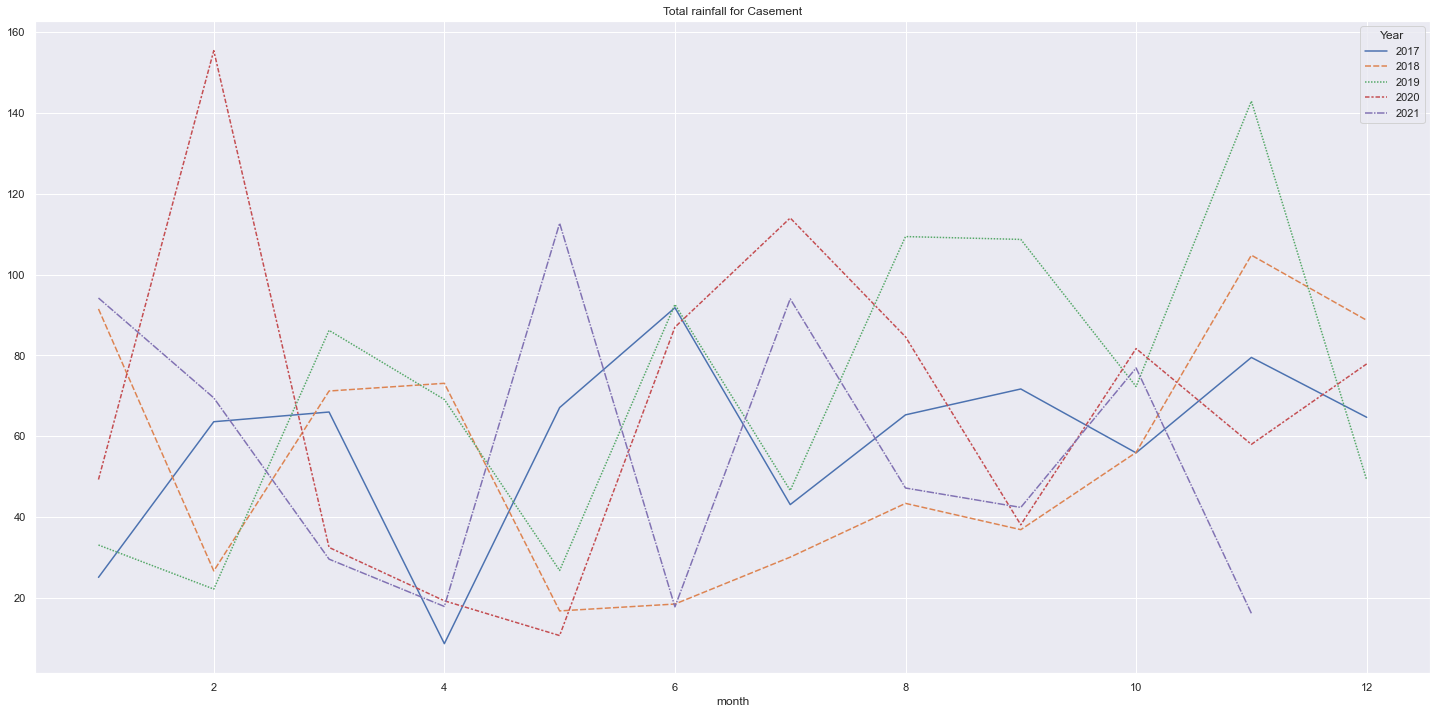

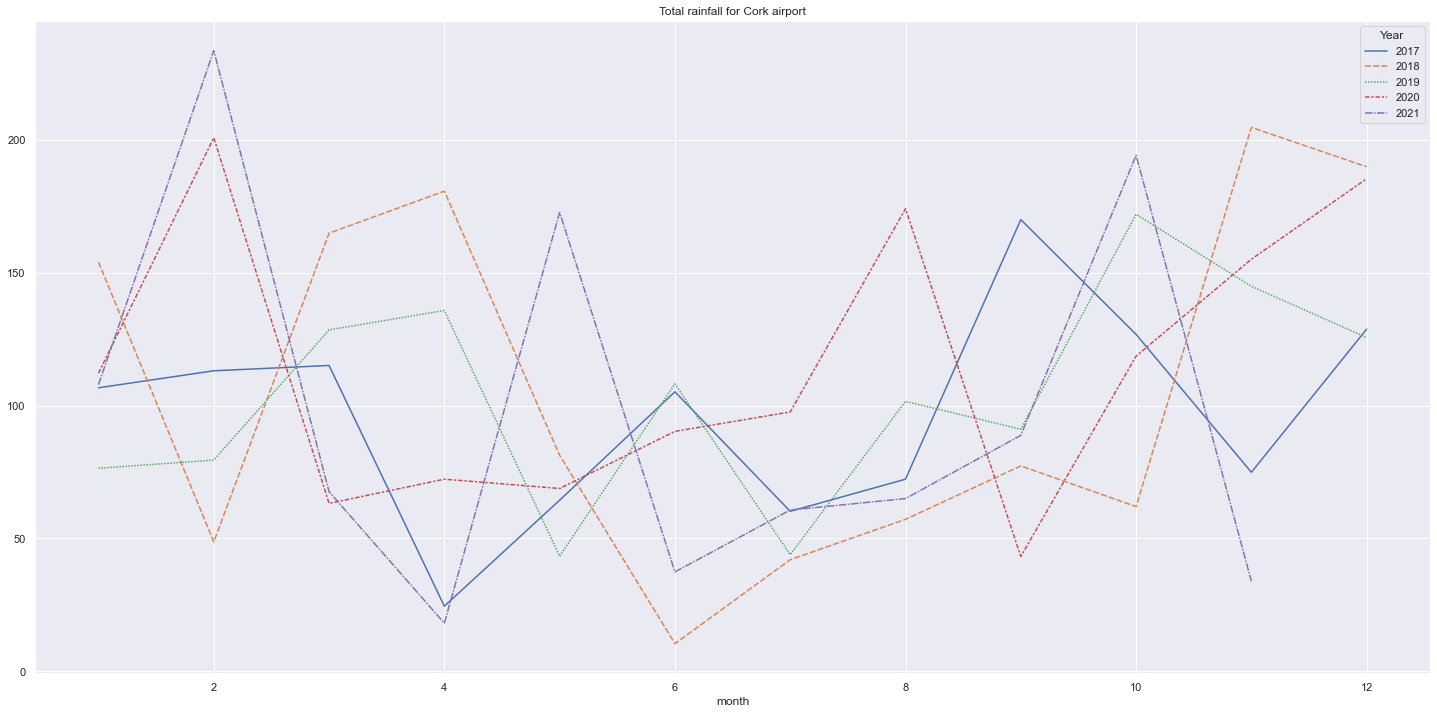

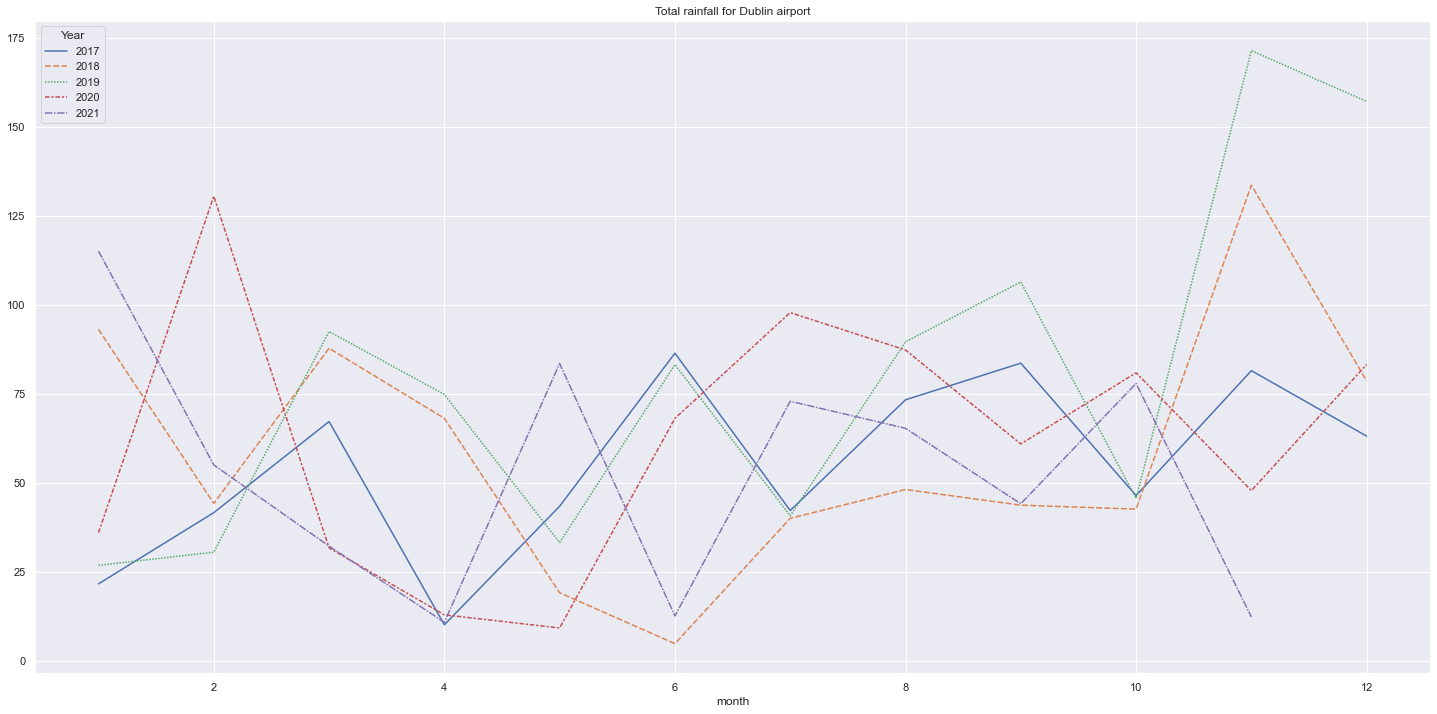

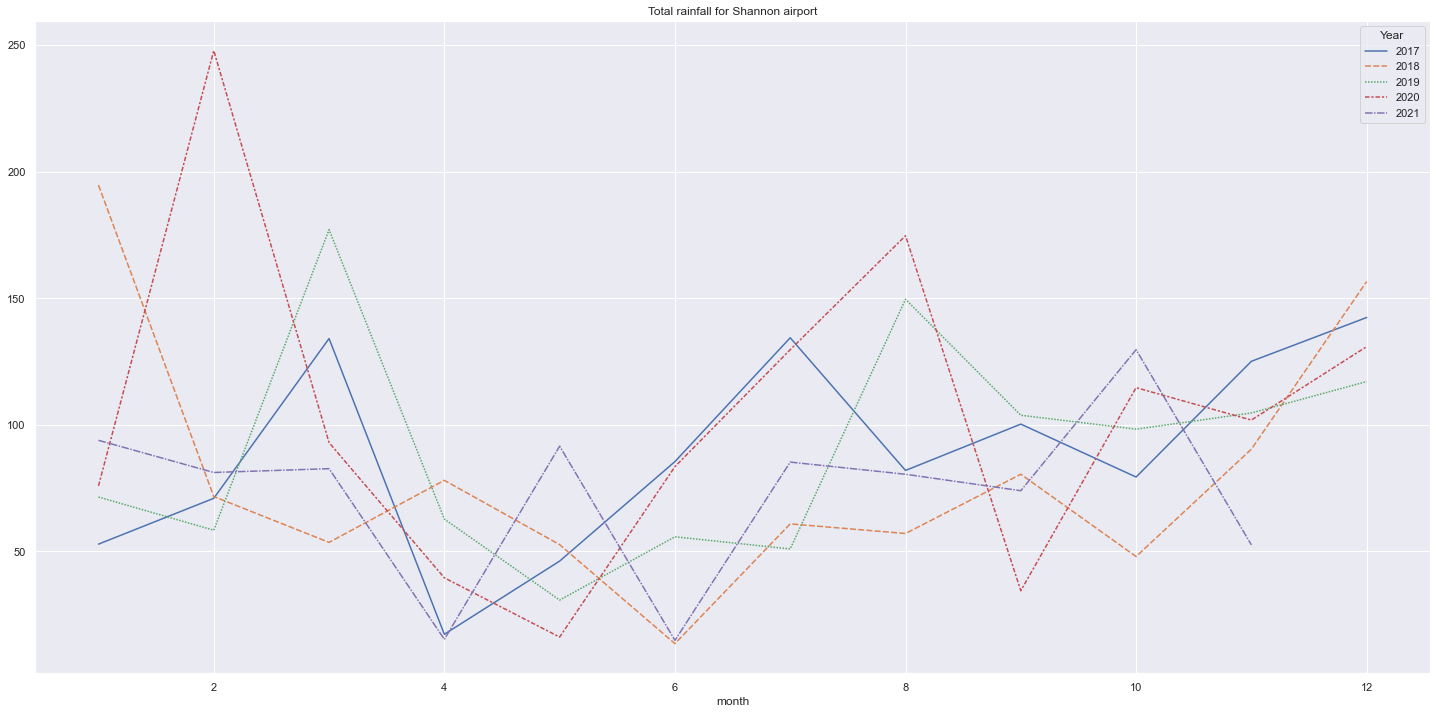

In [23]:
for station in stations_to_keep:
    plot_rainfall(rainfall_dataframe, 2017,station)

# Sunshine

In [24]:
sunshine_dataframe = sunshine_dataframe.rename(columns={'Meteorological Weather Station':'Met_Station'})

In [25]:
sunshine_dataframe = sunshine_dataframe.loc[sunshine_dataframe.Met_Station.isin(stations_to_keep)]
sunshine_dataframe = sunshine_dataframe.loc[sunshine_dataframe.Statistic == 'Total Sunshine Hours']
sunshine_dataframe.reset_index(inplace=True, drop=True)
sunshine_dataframe.head()

,Statistic,Month,Met_Station,UNIT,VALUE
0,Total Sunshine Hours,1958M01,Casement,Number,NaN
1,Total Sunshine Hours,1958M01,Cork airport,Number,NaN
2,Total Sunshine Hours,1958M01,Dublin airport,Number,79.5
3,Total Sunshine Hours,1958M01,Shannon airport,Number,64.1
4,Total Sunshine Hours,1958M02,Casement,Number,NaN


In [26]:
sunshine_dataframe["Year"]  = sunshine_dataframe.Month.apply(create_year)
sunshine_dataframe["month"] = sunshine_dataframe.Month.apply(create_month)
sunshine_dataframe.drop(["Month"],axis=1, inplace=True)
sunshine_dataframe.head()

,Statistic,Met_Station,UNIT,VALUE,Year,month
0,Total Sunshine Hours,Casement,Number,NaN,1958,1
1,Total Sunshine Hours,Cork airport,Number,NaN,1958,1
2,Total Sunshine Hours,Dublin airport,Number,79.5,1958,1
3,Total Sunshine Hours,Shannon airport,Number,64.1,1958,1
4,Total Sunshine Hours,Casement,Number,NaN,1958,2


In [27]:
sunshine_dataframe.loc[(sunshine_dataframe.Met_Station == "Claremorris") & (sunshine_dataframe.Year > 2017)]

,Statistic,Met_Station,UNIT,VALUE,Year,month


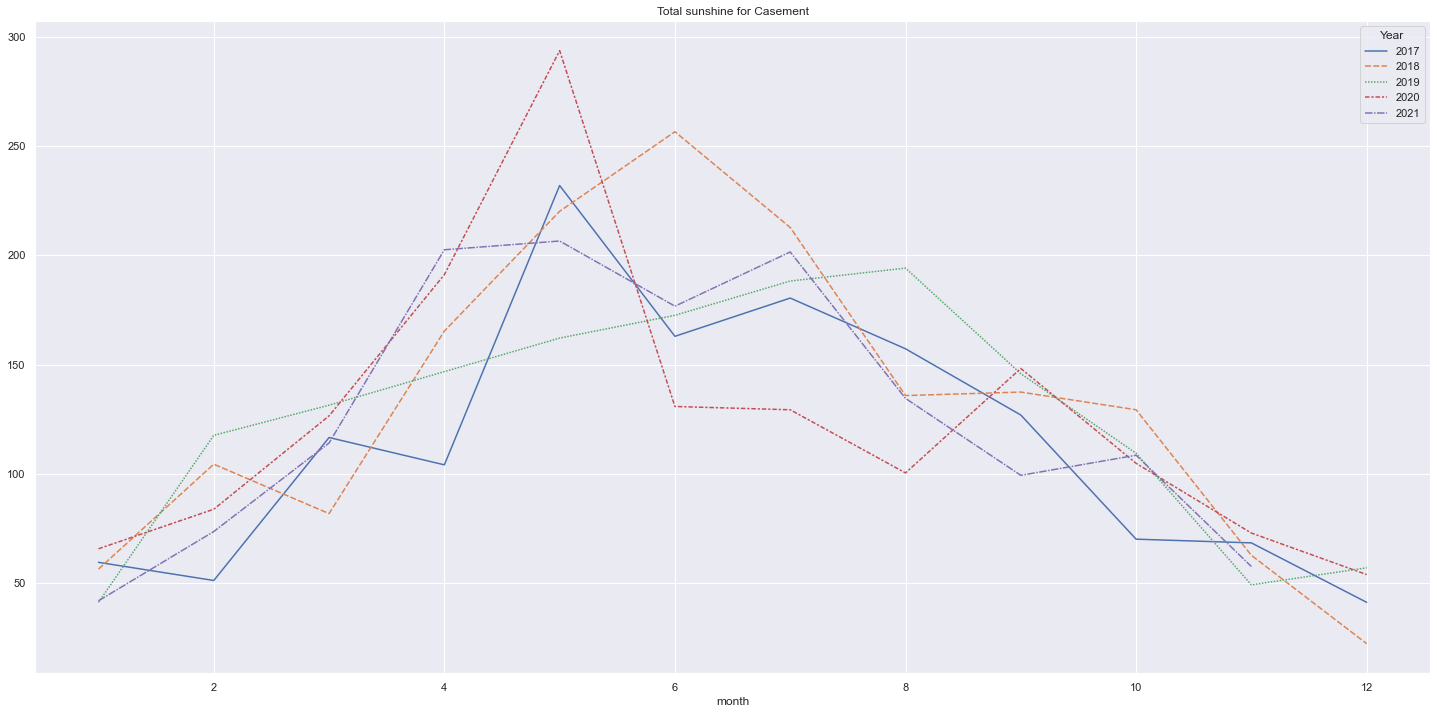

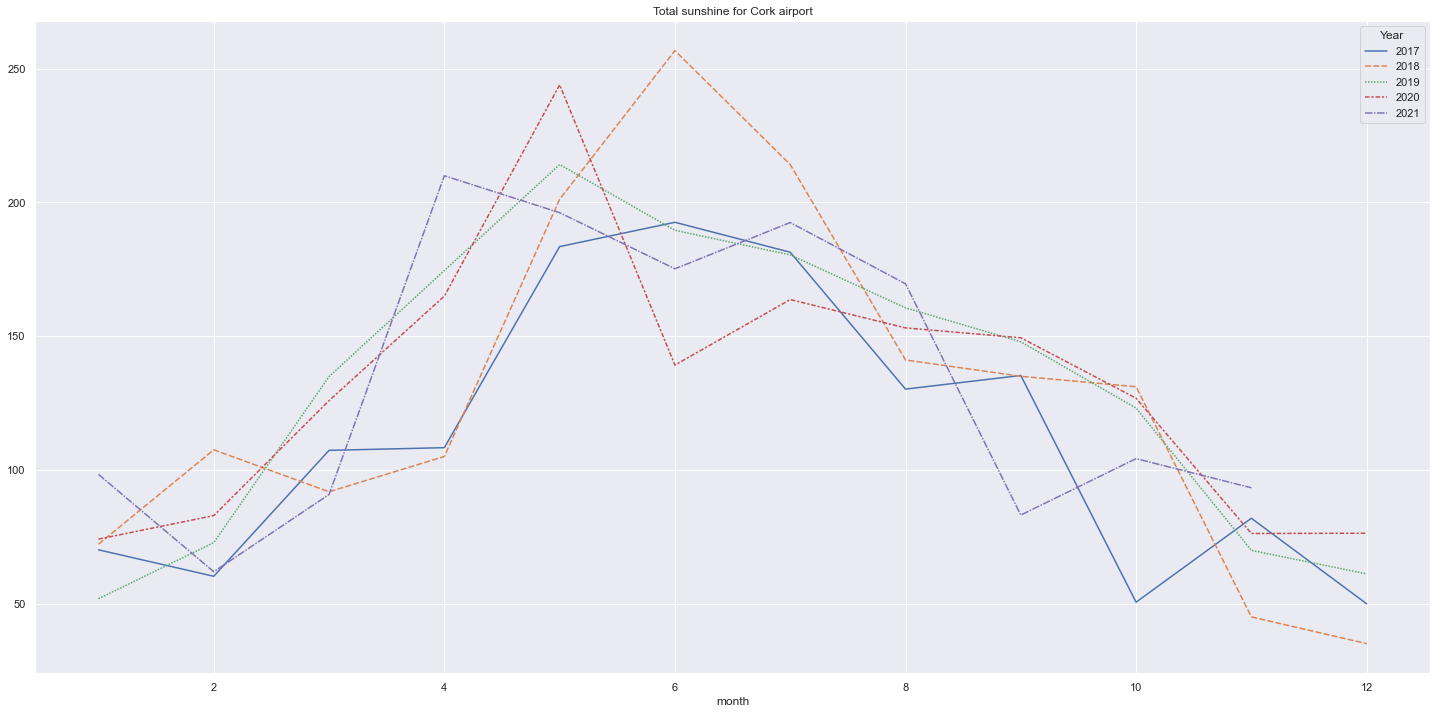

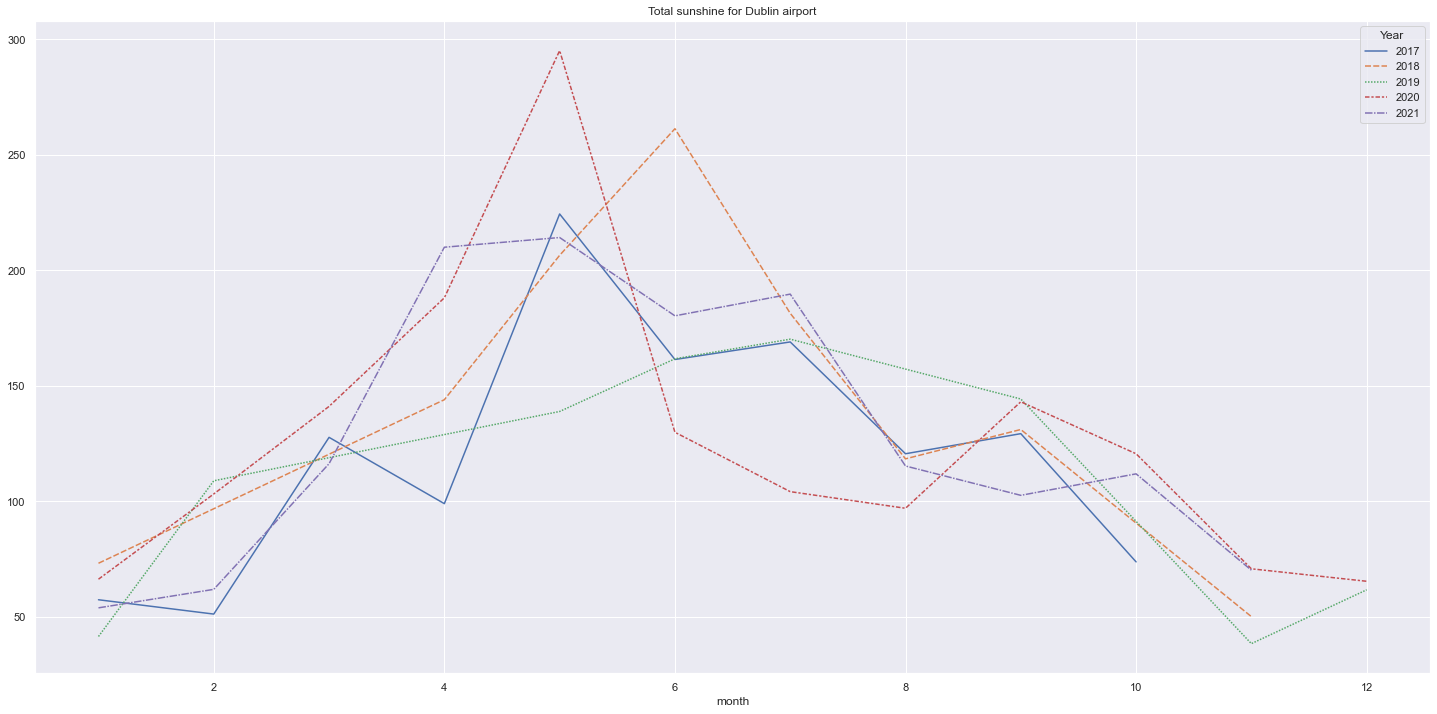

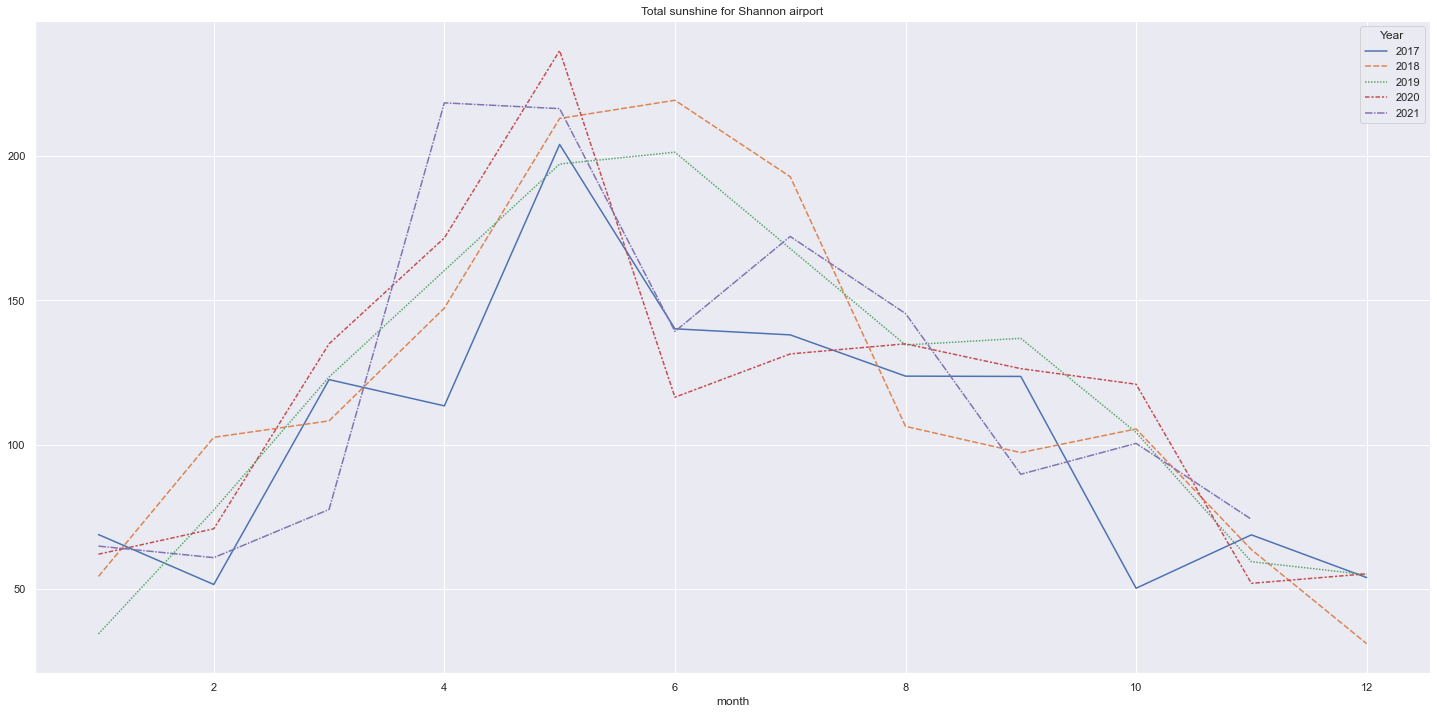

In [28]:
for station in stations_to_keep:
    plot_sunshine(sunshine_dataframe, 2017,station)

# Temperature

In [29]:
temperature_dataframe = temperature_dataframe.rename(columns={'Meteorological Weather Station':'Met_Station'})

In [30]:
temperature_dataframe = temperature_dataframe.loc[temperature_dataframe.Met_Station.isin(stations_to_keep)]
temperature_dataframe.reset_index(inplace=True,drop=True)
temperature_dataframe.head()

,Statistic,Month,Met_Station,UNIT,VALUE
0,Average Maximum Temperature,1958M01,Casement,Degrees C,NaN
1,Average Maximum Temperature,1958M01,Cork airport,Degrees C,NaN
2,Average Maximum Temperature,1958M01,Dublin airport,Degrees C,7.5
3,Average Maximum Temperature,1958M01,Shannon airport,Degrees C,8.4
4,Average Maximum Temperature,1958M02,Casement,Degrees C,NaN


In [31]:
temperature_dataframe["Year"] = temperature_dataframe.Month.apply(create_year)
temperature_dataframe["month"] = temperature_dataframe.Month.apply(create_month)
temperature_dataframe.drop(["Month"],axis=1,inplace=True)
temperature_dataframe.head()

,Statistic,Met_Station,UNIT,VALUE,Year,month
0,Average Maximum Temperature,Casement,Degrees C,NaN,1958,1
1,Average Maximum Temperature,Cork airport,Degrees C,NaN,1958,1
2,Average Maximum Temperature,Dublin airport,Degrees C,7.5,1958,1
3,Average Maximum Temperature,Shannon airport,Degrees C,8.4,1958,1
4,Average Maximum Temperature,Casement,Degrees C,NaN,1958,2


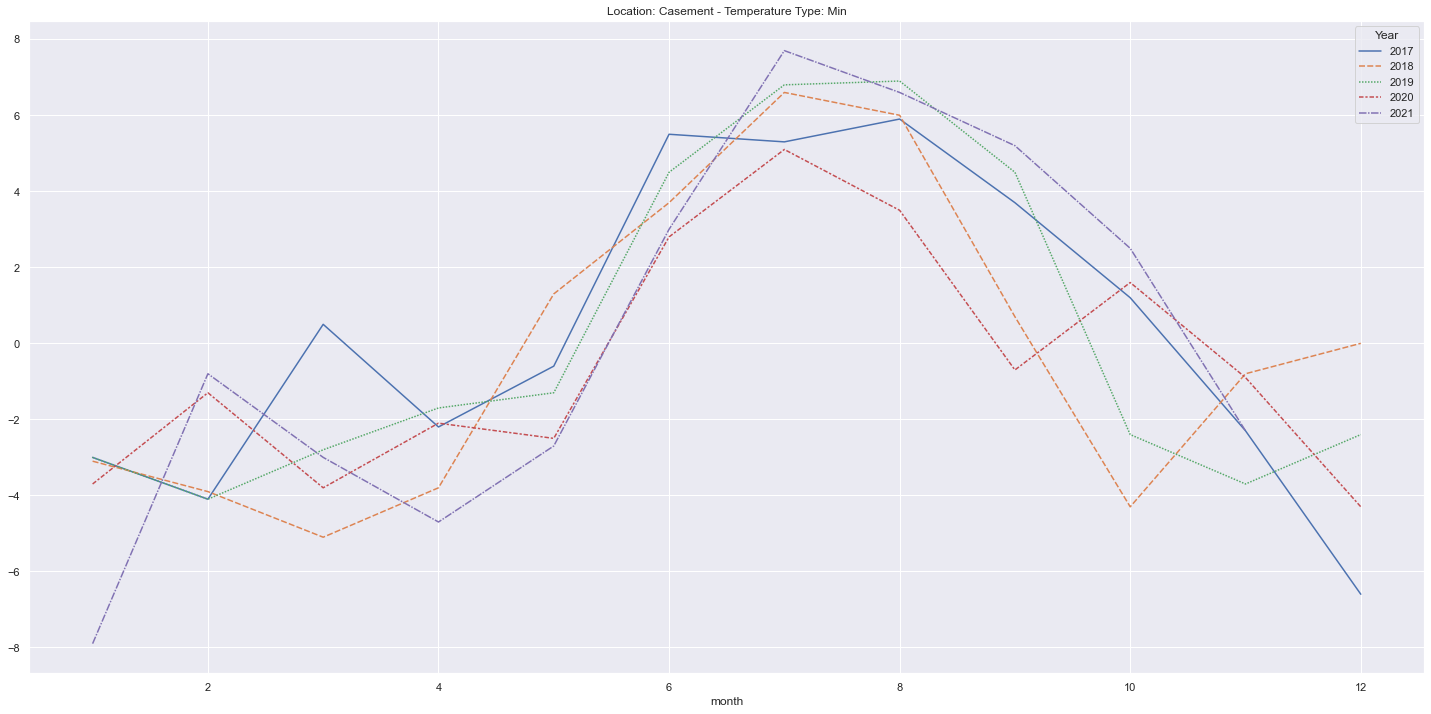

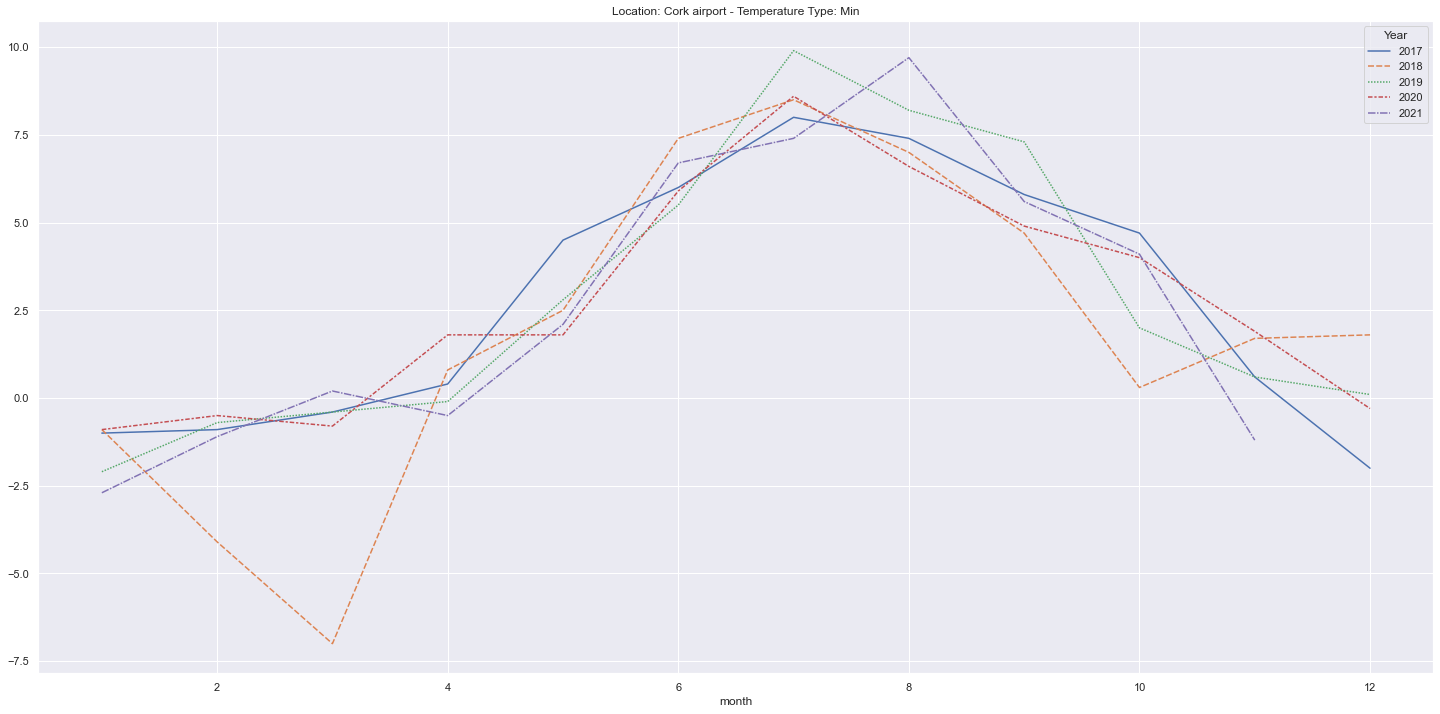

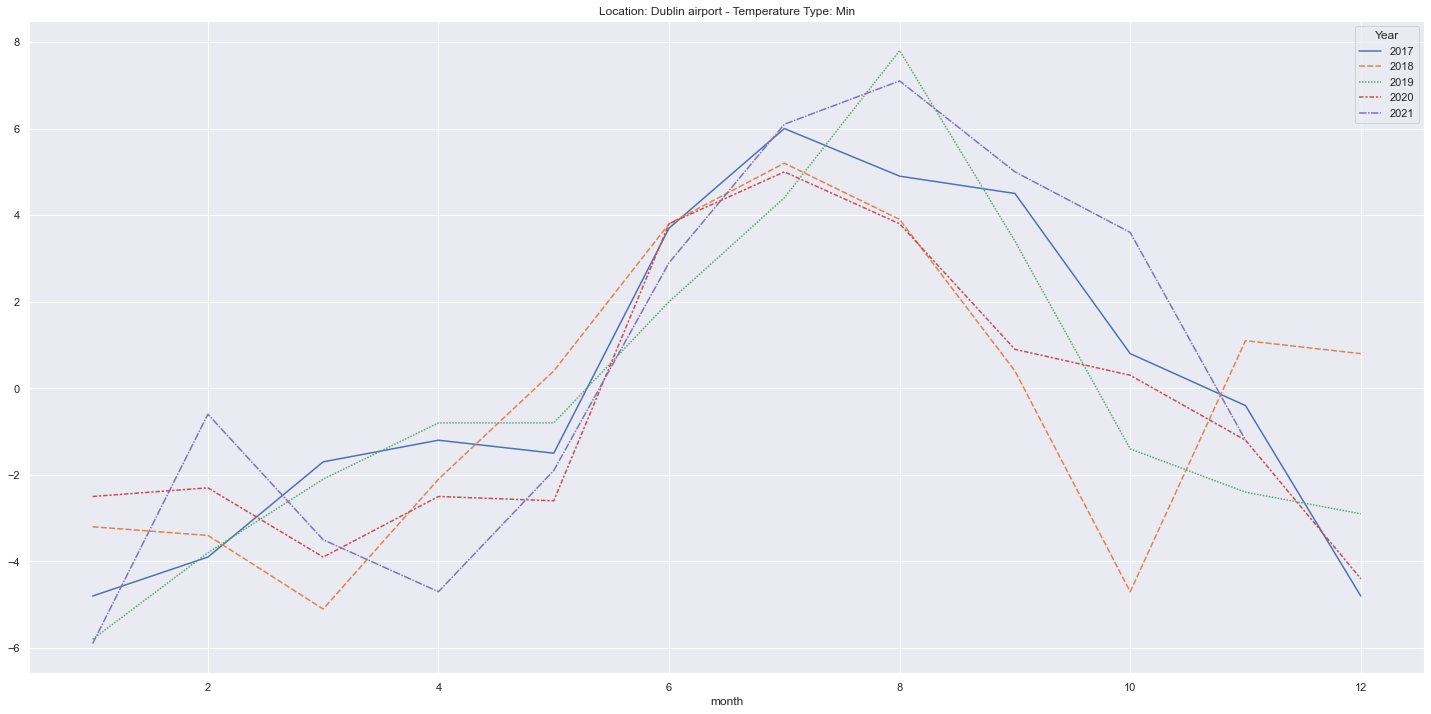

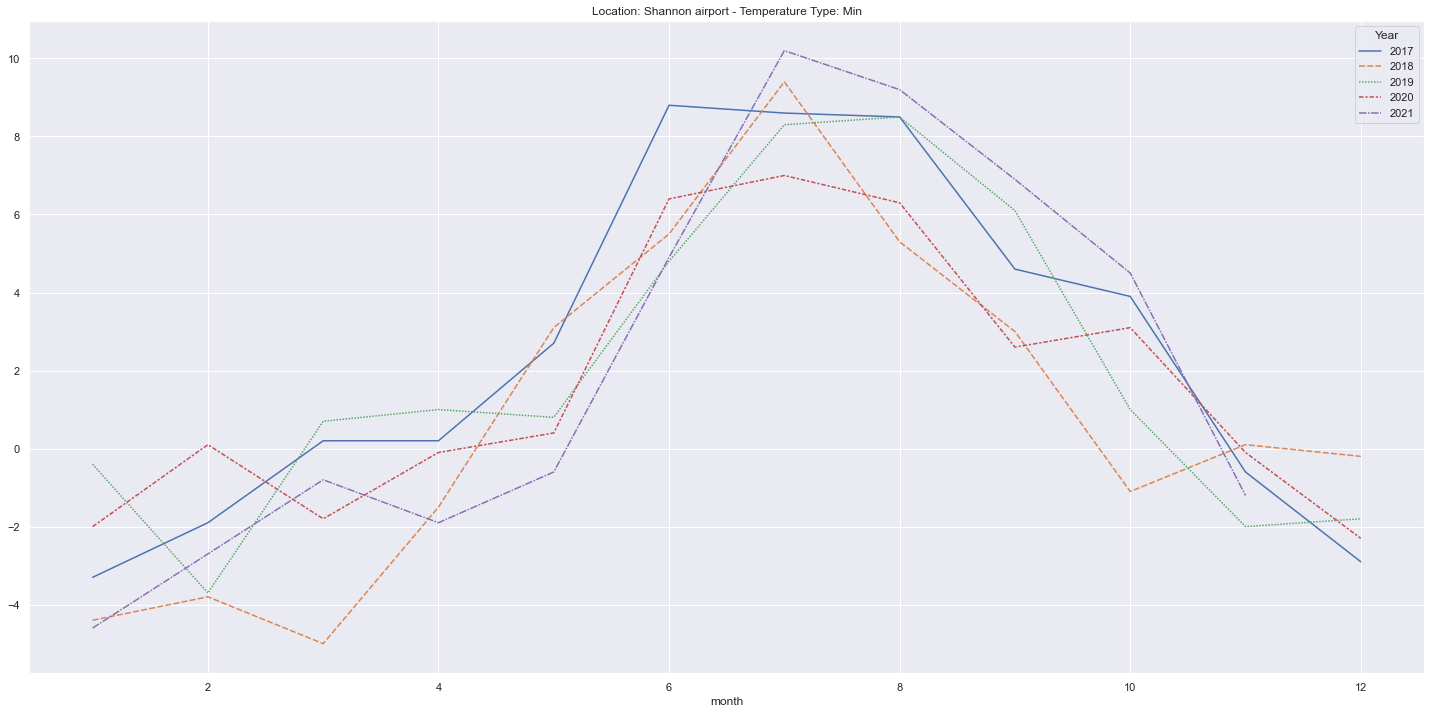

In [32]:
for station in stations_to_keep:
    plot_temp(temperature_dataframe, 2017, "Min", station)

# Rainfall x Sunshine Plots

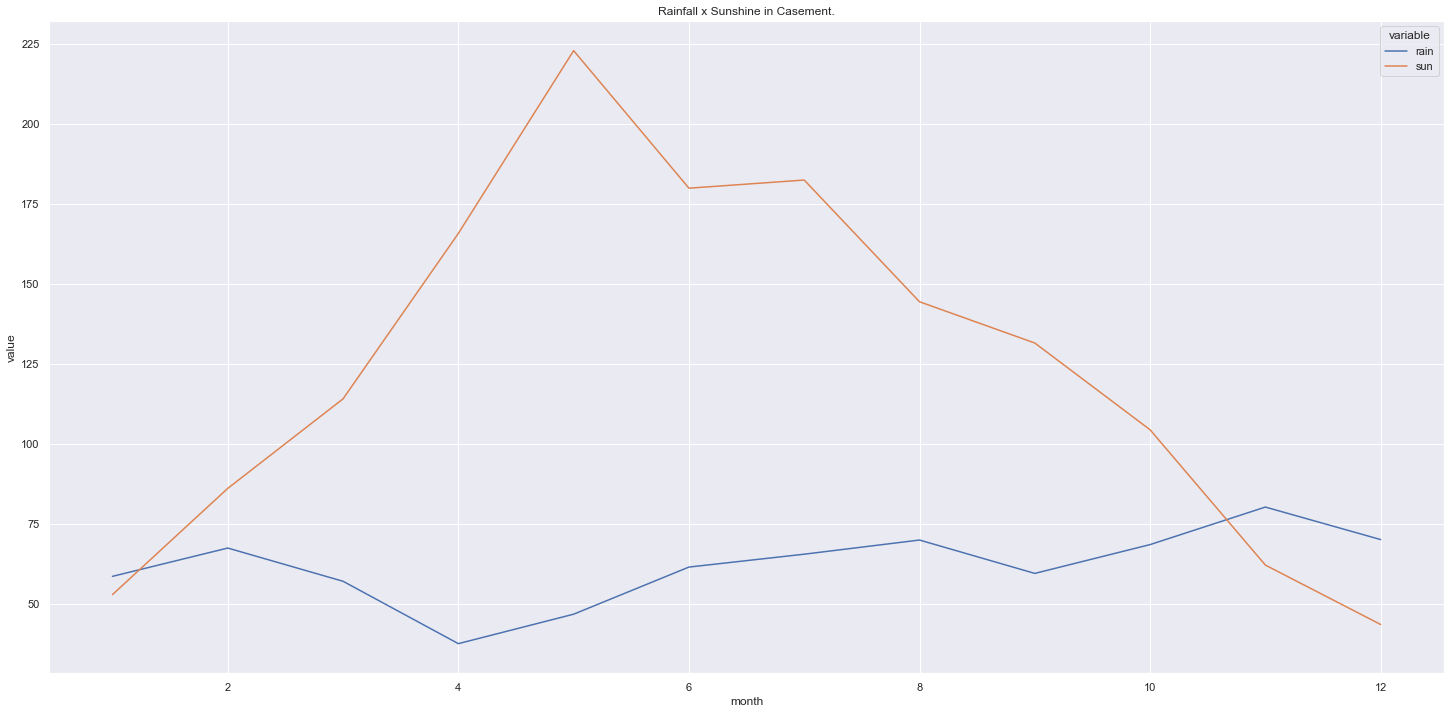

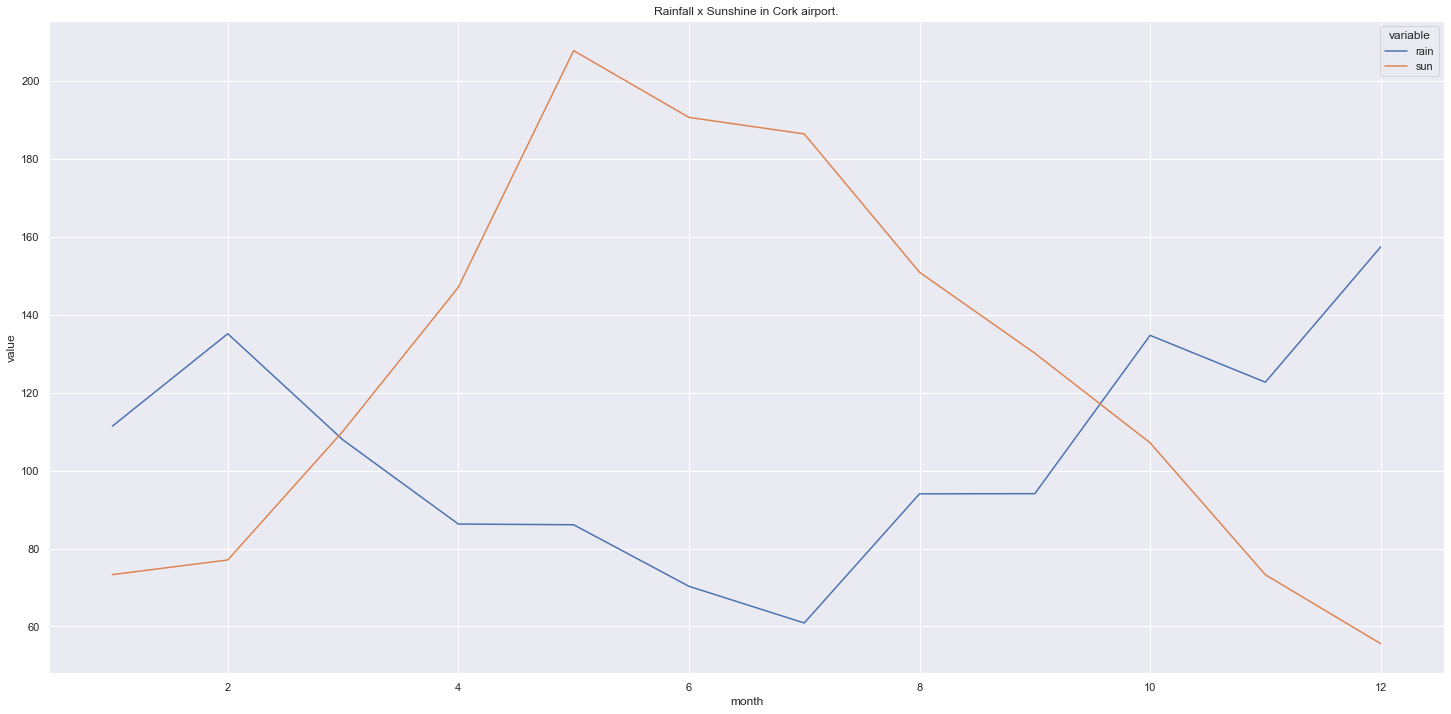

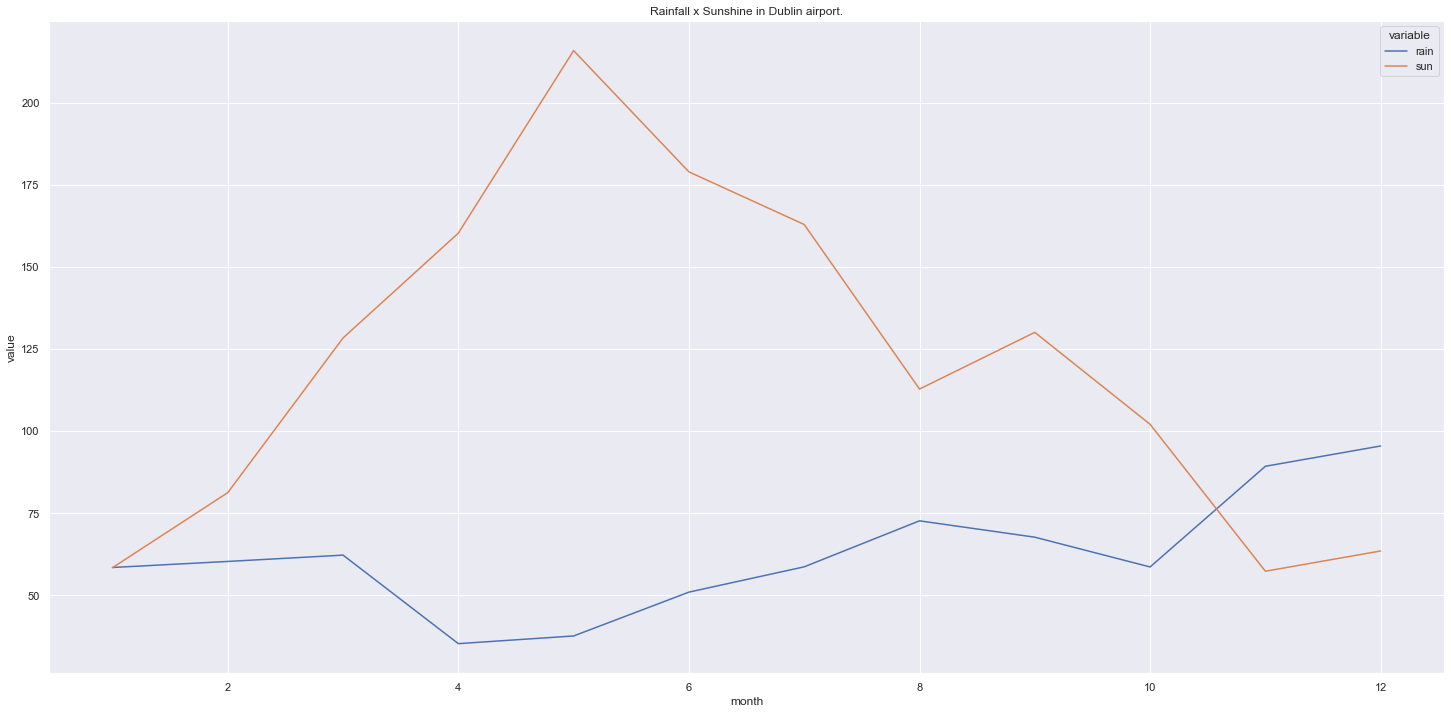

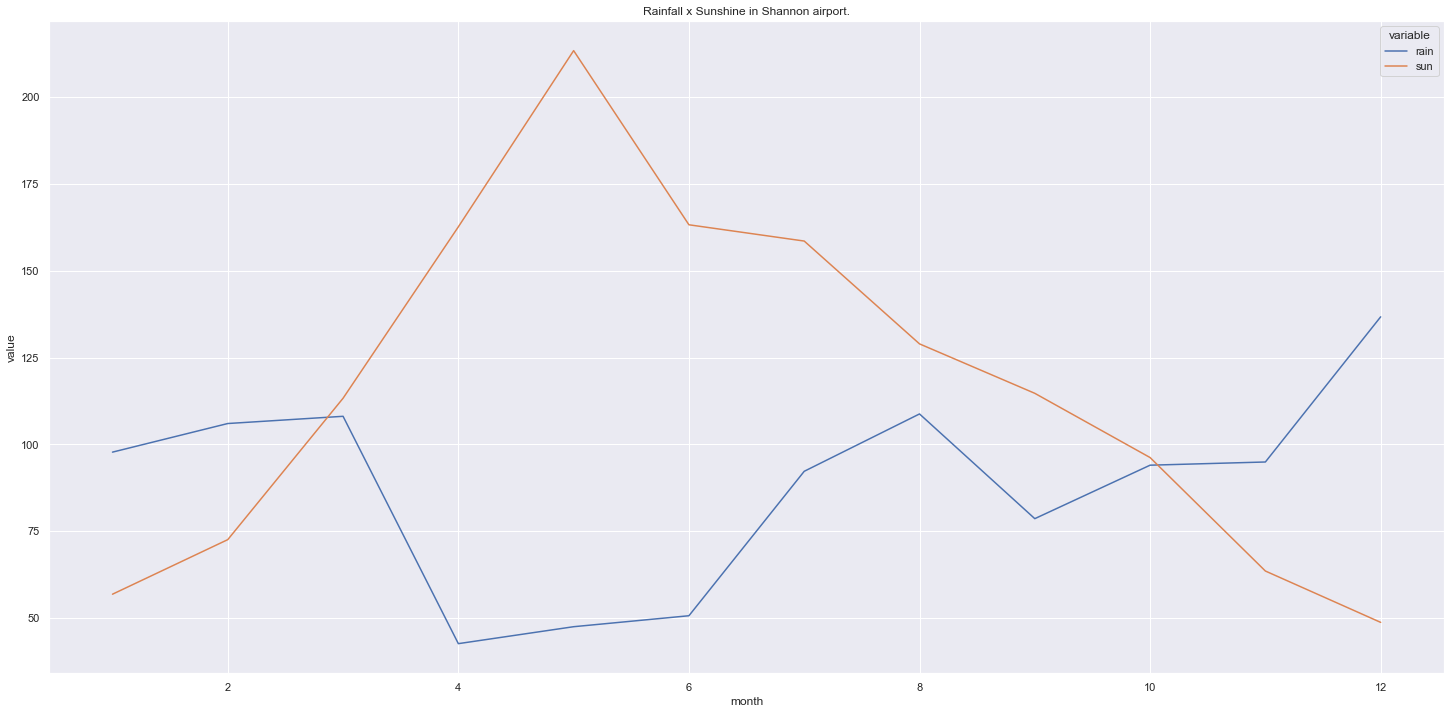

In [33]:
for station in stations_to_keep:
    compare_rain_sun(rainfall_dataframe, sunshine_dataframe, station,2017)

# Highest x Lowest Temperature Plots

Comparative visualization using previous function.

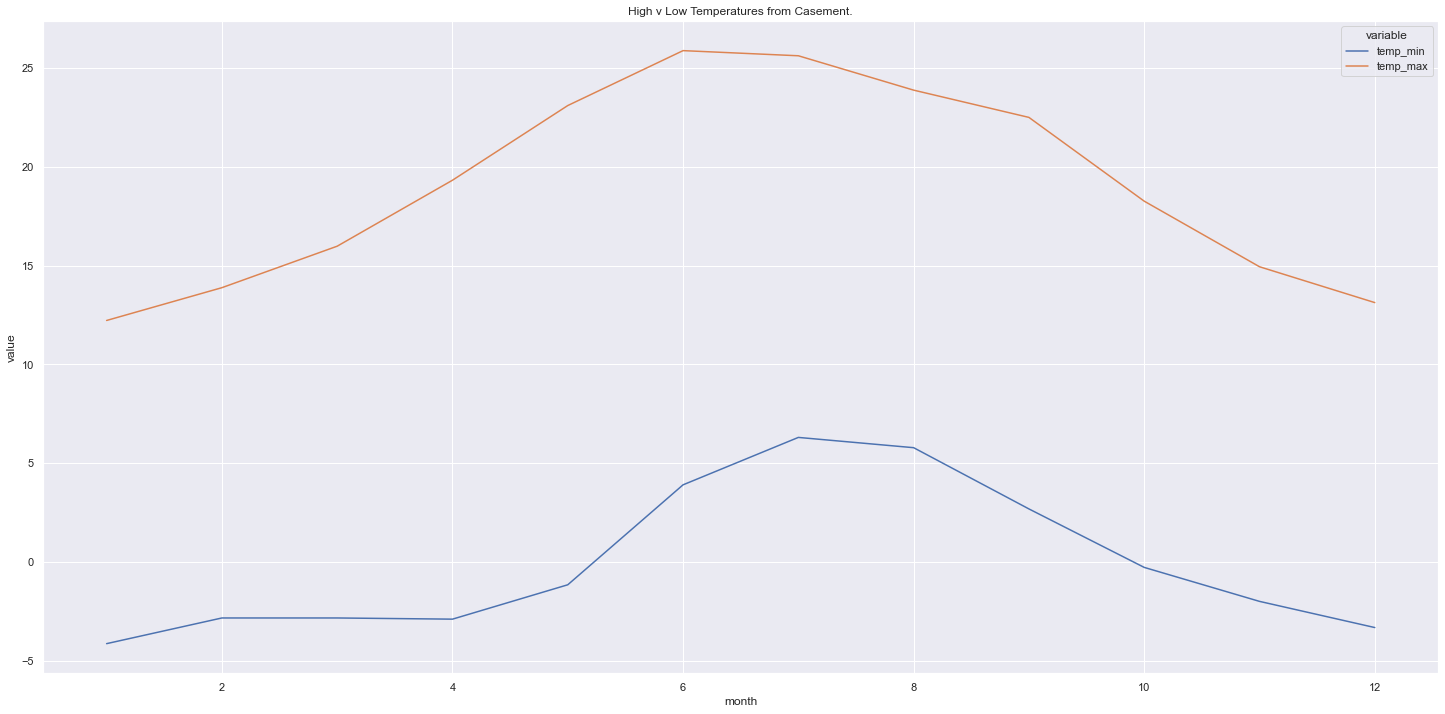

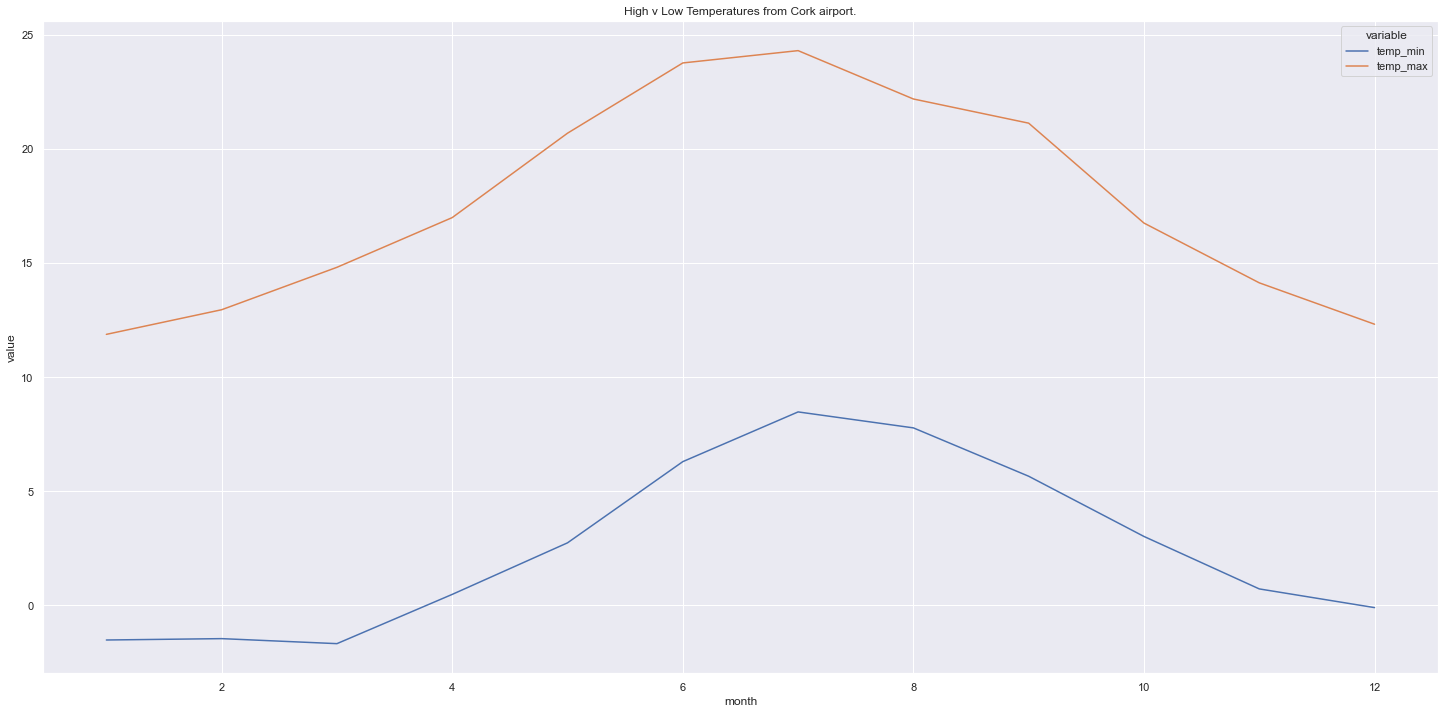

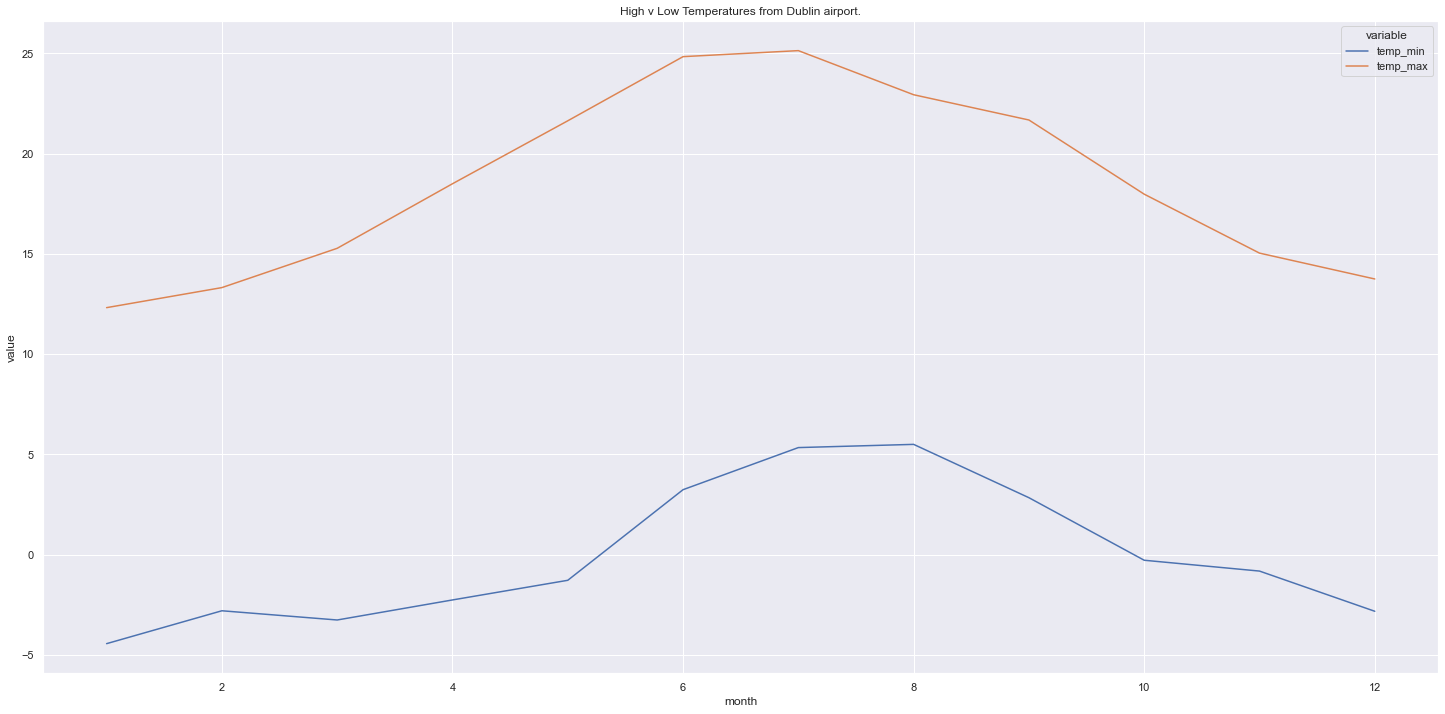

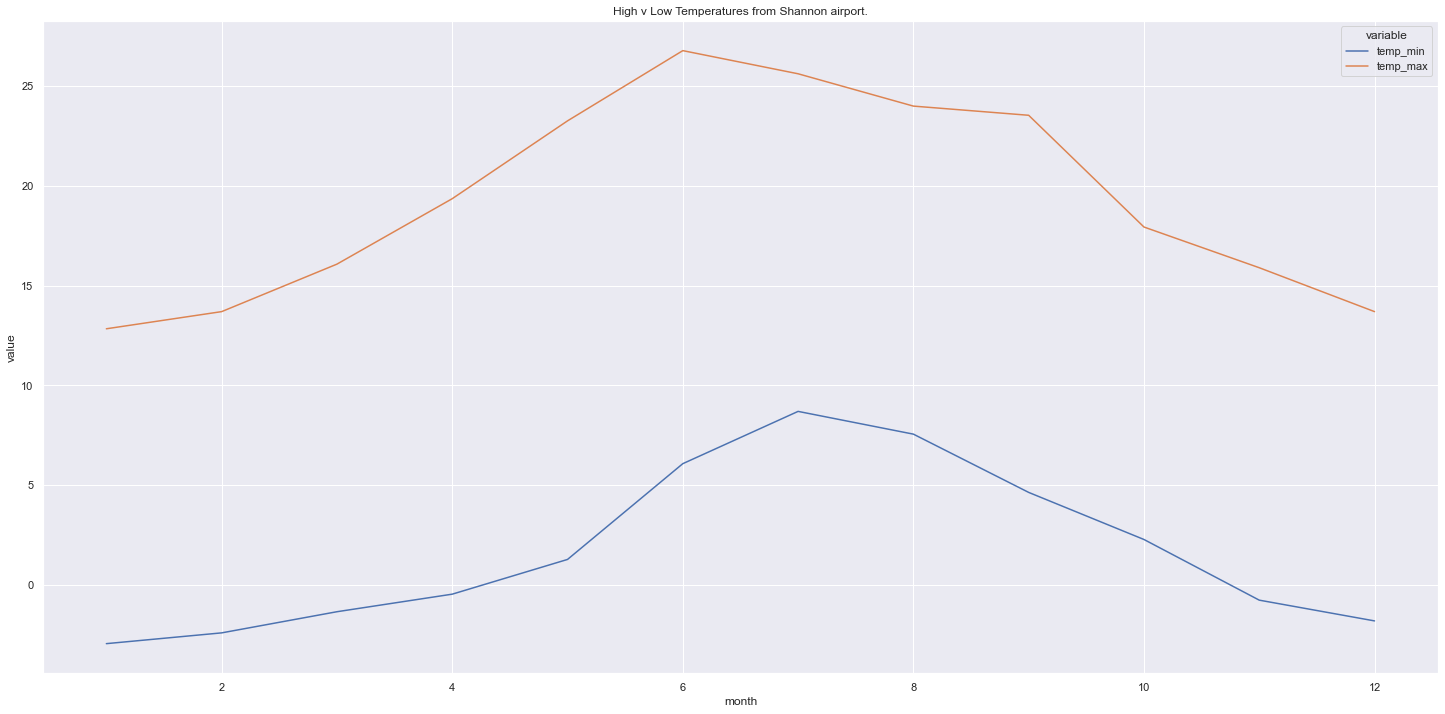

In [34]:
for station in stations_to_keep:
    compare_temp(temperature_dataframe,station,2017)